In [1]:
!pip -q install scipy
!pip -q install numpy
!pip -q install tqdm
!pip -q install matplotlib
!pip -q install pandas
!pip -q install nltk

In [2]:
import sys
import numpy as np
import functools 
import pandas as pd
from scipy.stats import kendalltau
from collections import defaultdict
from utils import *
from numpy.random import choice
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import scipy.stats

np.set_printoptions(precision=3)

In [3]:
path_log = './data/log.2.tsv'
path_topic = './data/topic.tsv'
path_sub_topic = './data/sub_topic.tsv'
path_retrievable_paragraph = './data/retrievable_paragraph.tsv'

# Data Preprocessing

In [4]:
topics = get_topics(path_topic)

topics

{1: 'harvard university',
 2: 'black death',
 3: 'intergovernmental panel on climate change',
 4: 'private schools',
 5: 'geology',
 6: 'economic inequality',
 7: 'immune system',
 8: 'oxygen',
 9: 'normans',
 10: 'amazon rainforest',
 11: 'european union law'}

In [5]:
sub_topics = get_sub_topics(path_sub_topic)

sub_topics

defaultdict(list,
            {10: [1, 2, 3, 4, 5],
             5: [6, 7, 8, 9, 10, 11],
             6: [12, 13, 14, 15, 16, 17],
             4: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
             2: [28, 29, 30, 31, 32],
             9: [33, 34, 35, 36],
             1: [37, 38, 39, 40, 41],
             8: [42, 43, 44, 45, 46, 47, 48, 49, 50],
             11: [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
             7: [61, 62, 63, 64, 65, 66],
             3: [67, 68, 69, 70, 71, 72]})

In [6]:
session_ids = get_session_ids(path_log)

session_ids

[('A2CTA782EBXUCT', 4),
 ('A23DLX3K161MH3', 8),
 ('A2QZ44GE67GNY5', 2),
 ('A1XKL37QKFITT1', 5),
 ('A1GKD3NG1NNHRP', 10),
 ('A1RDRK3QTM7U96', 4),
 ('A1G452MFAS690B', 5),
 ('A16Z9FSSF1X74O', 10),
 ('A3D2GO0IFRFN6R', 5),
 ('A2Q4Z6CADBW6WD', 3),
 ('A171UXH8M8F6HS', 8),
 ('A3141EW4WZT4Q0', 4),
 ('A2V4DP31BEVABF', 1),
 ('ARVO22MUH1FUZ', 10),
 ('A3J37RP5AZDACH', 5),
 ('A2EED3HLTA96CP', 10),
 ('A3UPAXLDS67HKJ', 3),
 ('AABCSDU3TZLNG', 3),
 ('A28LJ6540DSBSQ', 8),
 ('A1OTY8CU05T9ZN', 8),
 ('A3UN1F1EOHKKE6', 4),
 ('A30PFSEW4E2ZO8', 10),
 ('A1PTH9KTRO06EG', 8),
 ('A2ESBX4C2Q6TQY', 8),
 ('A3PVTAHBV33G82', 2),
 ('AQOUDUI0O8CI0', 11),
 ('A2T7VIFQS647LC', 5),
 ('A2T7VIFQS647LC', 8),
 ('A2CHDWKAYZ3P3E', 3),
 ('A3VDG4N48AVYGQ', 4),
 ('A1NCSZCN8EA787', 5),
 ('A2RBVMD2HTBCZ9', 4),
 ('A1969Q0R4Y0E3J', 11),
 ('A1PTH9KTRO06EG', 6),
 ('A31XNLA9REVGXL', 9),
 ('A1PKCBFB4QY19G', 3),
 ('A22BBAU24IEHPL', 9),
 ('A1MFQBQRNANOD6', 3),
 ('AMPMTF5IAAMK8', 10),
 ('A248QG4DPULP46', 10),
 ('A2CWNRI11XJ7WX', 3),
 ('A2N9U74Y

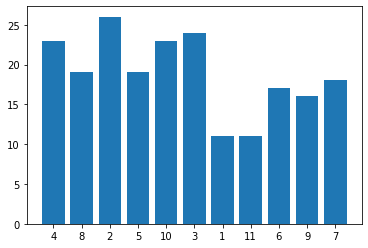

In [7]:
count_topics_per_user = defaultdict(int)

for user, topic in session_ids:
    count_topics_per_user[topic] += 1

plt.bar(range(len(count_topics_per_user)), list(count_topics_per_user.values()), align='center')
plt.xticks(range(len(count_topics_per_user)), list(count_topics_per_user.keys()))

plt.show()

In [27]:
sum(count_topics_per_user.values())

207

In [28]:
all_sequences = get_all_sequences(path_log, session_ids)

all_sequences

defaultdict(list,
            {4: [[(0, 607, 'relevant', 18, 'cost of private schools'),
               (18,
                597,
                'irrelevant',
                20,
                'how many schools are there in the us'),
               (20, 600, 'relevant', 22, 'advantages of private schools'),
               (22, 602, 'relevant', 26, 'private school enrollment')],
              [(0, 597, 'irrelevant', 20, 'private schools'),
               (20, 607, 'relevant', 18, 'private school cost'),
               (18, 597, 'irrelevant', 19, 'private school ranking'),
               (19, 600, 'relevant', 22, 'private vs public schools')],
              [(0, 596, 'relevant', 21, 'private school scholarships'),
               (21, 602, 'relevant', 26, 'private schools enrollment'),
               (26, 607, 'relevant', 18, 'private schools fee cost'),
               (18, 597, 'irrelevant', 20, 'private schools classes')],
              [(0, 597, 'relevant', 20, 'private school infor

In [30]:
sum_length = 0
n_length = 0
for topic in all_sequences:
    for sequence in all_sequences[topic]:
        sum_length += len(sequence)
        n_length += 1

sum_length/n_length

5.42512077294686

In [32]:
n_responces = 0
n_relevant = 0
for topic in all_sequences:
    for sequence in all_sequences[topic]:
        for action in sequence:
            if action[2] == 'relevant':
                n_relevant += 1
            n_responces += 1

n_relevant, n_responces

(816, 1123)

# Fitting the Evaluation Measures

In [10]:
gp = defaultdict(int)
for topic in all_sequences:
    for sequence in all_sequences[topic]:
        for m, _ in enumerate(sequence):
            gp[m] += 1

ngp = np.array([value for key, value in gp.items()])
ngp = ngp / np.sum(ngp)

ngp

array([0.184, 0.167, 0.159, 0.143, 0.118, 0.081, 0.054, 0.035, 0.023,
       0.012, 0.008, 0.005, 0.005, 0.004, 0.002])

In [11]:
# CP

def dd_cp():
    return 1

def d_cp(): # precision
    return dd_cp()

# CBP

def dd_cbp(alpha, m):
    return alpha ** m

def d_cbp(alpha, m): # cbp
    return dd_cbp(alpha, m)

# ECS

def dd_ecs(alpha_rel, alpha_irr, m, sequence):
    res = 1.0
    for action in sequence[:m]:
        if action[2] == 'relevant':
            res *= alpha_rel
        else:
            res *= alpha_irr
    for i in range(m - len(sequence)):
        res *= alpha_irr
    return res

def d_ecs(alpha_rel, alpha_irr, m, all_sequences):
    res = 0.0
    n = 0.0
    for topic_id, topic in enumerate(topics):
        for sequence in all_sequences[topic]:
            res += dd_ecs(alpha_rel, alpha_irr, m, sequence)
            n += 1.0
    return res/n

for i in range(15):
    print(d_ecs(0.8, 0.8, i, all_sequences), d_cbp(0.8, i), d_cp(), ngp[i])

1.0 1.0 1 0.18432769367764915
0.8000000000000009 0.8 1 0.16651825467497774
0.6399999999999999 0.6400000000000001 1 0.15939447907390916
0.5120000000000003 0.5120000000000001 1 0.1433659839715049
0.40959999999999863 0.4096000000000001 1 0.11754229741763135
0.32768000000000075 0.3276800000000001 1 0.08103294746215495
0.2621439999999994 0.2621440000000001 1 0.05431878895814782
0.2097152 0.20971520000000007 1 0.034728406055209264
0.16777215999999923 0.1677721600000001 1 0.02315227070347284
0.13421772799999962 0.13421772800000006 1 0.01157613535173642
0.1073741824 0.10737418240000006 1 0.008014247551202136
0.08589934591999997 0.08589934592000005 1 0.005342831700801425
0.06871947673599986 0.06871947673600004 1 0.005342831700801425
0.05497558138880026 0.054975581388800036 1 0.003561887800534283
0.04398046511103997 0.043980465111040035 1 0.0017809439002671415


## Precision@Length Model

In [12]:
min_err = sys.float_info.max
res = 100
M = len(ngp)
gt = ngp

def tse_cp():
    norm = 0.0
    for i in range(M):
        norm += d_cp()
    err = 0.0
    y_cp = []
    for i in range(M):
        val = d_cp()/norm
        y_cp.append(val)
        err += (gt[i]-val)**2
    return err, y_cp

min_err, y_cp = tse_cp()

print("l(TSE) = {:.4f}".format(np.log(min_err)))

def tae_cp():
    norm = 0.0
    for i in range(M):
        norm += d_cp()
    err = 0.0
    for i in range(M):
        val = d_cp()/norm
        err += abs(gt[i]-val)        
    return err

print("l(TAE) = {:.4f}".format(np.log(tae_cp())))

def kl_cp():
    norm = 0.0
    for i in range(M):
        norm += d_cp()
    err = 0.0
    for i in range(M):
        val = d_cp()/norm
        err += -gt[i] * np.log(val/gt[i])        
    return err

print("KL = {:.4f}".format(kl_cp()))

l(TSE) = -2.7129
l(TAE) = -0.1005
KL = 0.5317


## Conversational Biased Precision Model

In [13]:
min_err = sys.float_info.max
res = 100
best_alpha = -1
M = len(ngp)
gt = ngp

y_cbp = []
def kl_cbp(a):
    y_cbp = []
    norm = 0.0
    for i in range(M):
        norm += d_cbp(a, i)
    err = 0.0
    for i in range(M):
        val = d_cbp(a, i)/norm
        y_cbp.append(val)
        err += -gt[i] * np.log(val/gt[i])        
    return err, y_cbp

for a_i, a in enumerate(tqdm(np.linspace(0, 1, res+1))):        
    err, _y_cbp = kl_cbp(a)
        
    if err < min_err:
        min_err = err
        best_alpha = a
        y_cbp = _y_cbp

best_alpha_cbp = best_alpha

print("best alpha =", best_alpha) 
print("KL = {:.4f}".format(kl_cbp(best_alpha)[0]))

def tae_cbp(a):
    norm = 0.0
    for i in range(M):
        norm += d_cbp(a, i)
    err = 0.0
    for i in range(M):
        val = d_cbp(a, i)/norm
        err += abs(gt[i]-val)        
    return err

print("l(TAE) = {:.4f}".format(np.log(tae_cbp(best_alpha))))

def tse_cbp(a):
    y_cbp = []
    norm = 0.0
    for i in range(M):
        norm += d_cbp(a, i)
    err = 0.0
    for i in range(M):
        val = d_cbp(a, i)/norm
        y_cbp.append(val)
        err += (gt[i]-val)**2
    return err, y_cbp

print("l(TSE) = {:.4f}".format(np.log(tse_cbp(best_alpha)[0])))


best alpha = 0.76
KL = 0.0366
l(TAE) = -1.4493
l(TSE) = -4.8879


/home/alipani/anaconda3/envs/ConversationalSearchEvaluation/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


## Expected Conversation Satisfaction Model

In [14]:
min_err = sys.float_info.max
res = 100
best_alpha_rel = -1
best_alpha_irr = -1
M = len(ngp)
gt = ngp

y_ecs = []
def kl_ecs(a, b):
    y_ecs = []
    norm = 0.0
    for i in range(M):
        norm += d_ecs(a, b, i, all_sequences)
    err = 0.0
    for i in range(M):
        val = d_ecs(a, b, i, all_sequences)/norm
        y_ecs.append(val)
        err += -gt[i] * np.log(val/gt[i])        
    return err, y_ecs

for a_i, a in enumerate(tqdm(np.linspace(0, 1, 1*res+1))):      
    
    for b_i, b in enumerate(np.linspace(0, 1, res+1)):        
    
        err, _y_ecs = kl_ecs(a, b)

        if err < min_err:
            min_err = err
            best_alpha_rel = a
            best_alpha_irr = b
            y_ecs = _y_ecs

best_alpha_rel_ecs = best_alpha_rel
best_beta_irr_ecs = best_alpha_irr

print("alpha_rel =", best_alpha_rel, "alpha_irr =", best_alpha_irr)
print("KL = {:.4f}".format(kl_ecs(best_alpha_rel, best_alpha_irr)[0]))

def tae_ecs(a, b):
    norm = 0.0
    for i in range(M):
        norm += d_ecs(a, b, i, all_sequences)
    err = 0.0
    for i in range(M):
        val = d_ecs(a, b, i, all_sequences)/norm
        err += abs(gt[i]-val)        
    return err

print("l(TAE) = {:.4f}".format(np.log(tae_ecs(best_alpha_rel, best_alpha_irr))))

def tse_ecs(a, b):
    y_ecs = []
    err = 0.0
    norm = 0.0
    for i in range(M):
        norm += d_ecs(a, b, i, all_sequences)
    for i in range(M):
        val = d_ecs(a, b, i, all_sequences)/norm
        y_ecs.append(val)
        err += (gt[i]-val)**2
    return err, y_ecs

print("l(TSE) = {:.4f}".format(np.log(tse_ecs(best_alpha_rel, best_alpha_irr)[0])))

/home/alipani/anaconda3/envs/ConversationalSearchEvaluation/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log



alpha_rel = 0.98 alpha_irr = 0.56
KL = 0.0050
l(TAE) = -2.5669
l(TSE) = -7.3392


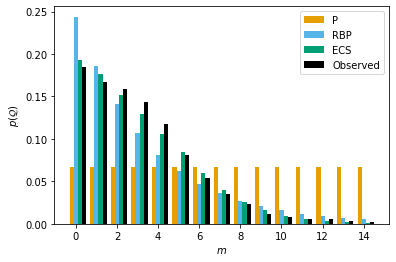

In [15]:
x = np.arange(M)

bar_width = 0.20

plt.bar(x-bar_width*1, y_cp, width = bar_width, color='#E69F00', align='center', label='P')
plt.bar(x+bar_width*0, y_cbp, width = bar_width, color='#56B4E9', align='center', label='RBP')
plt.bar(x+bar_width*1, y_ecs, width = bar_width, color='#009E73', align='center', label="ECS")
plt.bar(x+bar_width*2, gt, width = bar_width, color='black', align='center', label="Observed")

#plt.rc('font', size=13)
plt.ylabel('$p(\\mathcal{Q})$')
plt.xlabel('$m$')

plt.legend()
plt.savefig("probability_of_querying.png", dpi=300)

# Condition Probability Analysis

## Same vs Other Topic

In [16]:
probs = defaultdict(int)
transitions_tables = {}
for topic_id, topic in enumerate(topics):
    sequences = all_sequences[topic]
    
    for sequence in sequences:
        #print(sequence)
        prev_item = sequence[0]
        for item in sequence[1:]:
            if prev_item[2] == 'relevant':
                if item[3] == prev_item[3]:
                    #print("rel, same topic")
                    probs["same | rel"] += 1
                else:
                    #print("rel, different")
                    probs["different | rel"] += 1
            else:
                if item[3] == prev_item[3]:
                    #print("not_rel, same")
                    probs["same | not_rel"] += 1
                else:
                    #print("not_rel, different")
                    probs["different | not_rel"] += 1
            prev_item = item
    
norm_rel = sum([value for key, value in probs.items() if "not_rel" not in  key])
norm_not_rel = sum([value for key, value in probs.items() if "not_rel" in  key])

for key, value in probs.items():
    if "not_rel" not in key:
        print(key, value / norm_rel)
        probs[key] = value/norm_rel
    else: 
        print(key, value / norm_not_rel)
        probs[key] = value/norm_not_rel

different | not_rel 0.659919028340081
different | rel 0.8789237668161435
same | not_rel 0.340080971659919
same | rel 0.1210762331838565


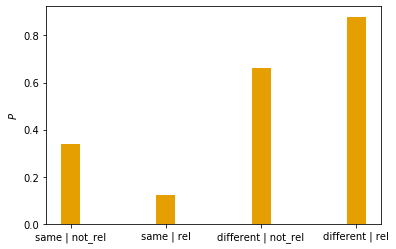

In [17]:
x = ['same | not_rel', 'same | rel', 'different | not_rel', 'different | rel']

bar_width = 0.20

y = [probs['same | not_rel'], probs['same | rel'], probs['different | not_rel'], probs['different | rel']]

plt.bar(x, y, width = bar_width, color='#E69F00', align='center')

plt.ylabel('$P$')
plt.show()

## Influence of a Relevant Document to the next Subtopic

In [18]:
# from users
# topic -> sub_topic -> paragraphs
qrels_users = {}

for topic in sub_topics:
    for sequence in all_sequences[topic]:
        for action in sequence:
            paragraph = action[1]
            rel = action[2]
            sub_topic = action[3]
            if rel == 'relevant':
                if topic not in qrels_users:
                    qrels_users[topic] = {}
                if sub_topic not in qrels_users[topic]:
                    qrels_users[topic][sub_topic] = set()
                qrels_users[topic][sub_topic].add(paragraph)

#qrels_users

In [19]:
# topic -> sub_topic -> paragraphs
qrels = defaultdict(dict)

sub_topic_to_paragraph = defaultdict(set)
with open(path_retrievable_paragraph) as f:
    for line in f.readlines()[1:]:
        items = line.split('\t')
        sub_topic = int(items[0])
        paragraph = int(items[1])
        sub_topic_to_paragraph[sub_topic].add(paragraph)

sub_topics = get_sub_topics(path_sub_topic)

for topic in sub_topics:
    for sub_topic in sub_topics[topic]:
        qrels[topic][sub_topic] = sub_topic_to_paragraph[sub_topic]

#qrels

In [20]:
#P(of quering a sub_topic to which the examined document belongs | current doc is relevant to the current query and the queried sub_topic)

def get_rel_sub_topics(document, topic):
    rel_sub_topics = set()
    for sub_topic in qrels_users[topic]:
        if document in qrels_users[topic][sub_topic]:
            rel_sub_topics.add(sub_topic)
    return rel_sub_topics

probs = defaultdict(int)

num = 0
den = 0
for topic in topics:
    sequences = all_sequences[topic]
    for sequence in sequences:
        prev_action = sequence[0]
        for action in sequence[1:]:
            rel_sub_topics = get_rel_sub_topics(prev_action[1], topic)
            if prev_action[2] == 'relevant' and prev_action[1] != action[1] and len(rel_sub_topics) > 1:
                #print(prev_action, action, get_rel_sub_topics(prev_action[1], topic))
                if action[3] in rel_sub_topics:
                    num += 1
                den += 1
            prev_action = action
            
print(num, den, num/den)

33 286 0.11538461538461539


## How many times our qrels agree with the user relevance?

In [21]:
probs = defaultdict(int)
transitions_tables = {}

for topic in topics:
    sequences = all_sequences[topic]
    for sequence in sequences:
        for action in sequence[1:]:
            #print(action)
            if action[2] == 'relevant':
                probs["TP"] += 1
            else:
                probs["FP"] += 1
            
norm = sum(probs.values())
for key, value in probs.items():
    print(key, value / norm)
print(norm)

print(probs["TP"]/norm)

TP 0.6997816593886463
FP 0.3002183406113537
916
0.6997816593886463


# Correlation Analysis (CBS score vs Satisfaction)

In [22]:
# CP

def dd_cp(alpha, m, l):
    return 1

def ncp(sequence):
    res = 0.0
    for action in sequence:
        if action[2] == 'relevant':
            res += dd_cp(None, None, None)
    return res/len(sequence)

def get_ncp_list(sequences):
    res = []
    for sequence in sequences:
        res.append(ncp(sequence))
    return res

# CBP

def dd_cbp(alpha, m, l = None):
    return alpha ** m

def dd_ncbp(alpha, m, l):
    norm = 0.0
    for i in range(l):
        norm += dd_cbp(alpha, i, l)
    return dd_cbp(alpha, m, l)/norm

def ncbp(sequence, alpha):
    res = 0.0
    for m, action in enumerate(sequence):
        if action[2] == 'relevant':
            res += dd_ncbp(alpha, m, len(sequence))
    return res

def get_ncbp_list(sequences, alpha):
    res = []
    for sequence in sequences:
        res.append(ncbp(sequence, alpha))
    return res

# ECS

def dd_necs(alpha_rel, alpha_irr, m, sequence):
    res = 1.0
    for action in sequence[:m]:
        if action[2] == 'relevant':
            res *= alpha_rel
        else:
            res *= alpha_irr
    norm = 0.0
    for i in range(len(sequence)):
        norm += dd_cbp(alpha_rel, i)
    return res/norm

def necs(sequence, alpha_rel, alpha_irr):
    res = 0.0
    for m, action in enumerate(sequence):
        if action[2] == 'relevant':
            res += dd_necs(alpha_rel, alpha_irr, m, sequence)
    return res

def get_necs_list(sequences, alpha_rel, alpha_irr):
    res = []
    for sequence in sequences:
        res.append(necs(sequence, alpha_rel, alpha_irr))
    return res

In [23]:
necs_scores = []
ncbp_scores = []
ncp_scores = []

print("ECS", best_alpha_rel_ecs, best_beta_irr_ecs)
print("CBP", best_alpha_cbp)

for topic in topics:
    sequences = all_sequences[topic]
    necs_scores.append((topic, get_necs_list(sequences, best_alpha_rel_ecs, best_beta_irr_ecs)))
    ncbp_scores.append((topic, get_ncbp_list(sequences, best_alpha_cbp)))
    ncp_scores.append((topic, get_ncp_list(sequences)))

ECS 0.98 0.56
CBP 0.76


In [24]:
def get_satisfaction(lines):
    reg_exp = RegExp()
    satisfaction = None
    for line in lines:
        items = line.split('\t')
        content = items[2]
        if reg_exp.get(r'user is (.+)', content):
            satisfaction = reg_exp.res
    return satisfaction

def get_all_satisfactions(path_log, session_ids):
    res = defaultdict(list)
    for session_id in session_ids:
        selected_lines = []
        with open(path_log) as f:
            for line in f.readlines()[1:]:
                items = line.split('\t')
                user = items[3].strip()
                topic = int(items[4].strip())
                if user == session_id[0] and topic == session_id[1]:
                    selected_lines.append(line)

        satisfaction = get_satisfaction(selected_lines)
        res[session_id[1]].append(satisfaction)
    return res

all_satisfactions = get_all_satisfactions(path_log, session_ids)

satisfaction_scores = []
for topic in topics:
    satisfactions = all_satisfactions[topic]
    if len(satisfactions) > 0:
        satisfaction_score = []
        for satisfaction in satisfactions:
            if satisfaction == 'satisfied':
                satisfaction_score.append(1.0)
            else:
                satisfaction_score.append(0.0)
        satisfaction_scores.append((topic, satisfaction_score))
        
satisfaction_scores = sorted(satisfaction_scores)
#satisfaction_scores

In [37]:
n_sat = 0
for topic in all_satisfactions:
    for sat in all_satisfactions[topic]:
        if sat == 'satisfied':
            n_sat += 1
n_sat

150

In [38]:
def unpack(l):
    return [np.mean(i[1]) for i in l]

print("ECS", scipy.stats.kendalltau(unpack(necs_scores), unpack(satisfaction_scores)))
print("CBP", scipy.stats.kendalltau(unpack(ncbp_scores), unpack(satisfaction_scores)))
print("P",   scipy.stats.kendalltau(unpack(ncp_scores),  unpack(satisfaction_scores)))
print()
print("ECS", scipy.stats.spearmanr(unpack(necs_scores),  unpack(satisfaction_scores)))
print("CBP", scipy.stats.spearmanr(unpack(ncbp_scores),  unpack(satisfaction_scores)))
print("P",   scipy.stats.spearmanr(unpack(ncp_scores),   unpack(satisfaction_scores)))
print()
print("ECS", scipy.stats.pearsonr(unpack(necs_scores),   unpack(satisfaction_scores)))
print("CBP", scipy.stats.pearsonr(unpack(ncbp_scores),   unpack(satisfaction_scores)))
print("P",   scipy.stats.pearsonr(unpack(ncp_scores),    unpack(satisfaction_scores)))

ECS KendalltauResult(correlation=0.7339758434175737, pvalue=0.001787289036987269)
CBP KendalltauResult(correlation=0.697277051246695, pvalue=0.0030042622393982835)
P KendalltauResult(correlation=0.697277051246695, pvalue=0.0030042622393982835)

ECS SpearmanrResult(correlation=0.870161710874372, pvalue=0.0004954180897534654)
CBP SpearmanrResult(correlation=0.8382709675438977, pvalue=0.0012683508950782564)
P SpearmanrResult(correlation=0.8382709675438977, pvalue=0.0012683508950782564)

ECS (0.9087016050567486, 0.000107581431217235)
CBP (0.8869321374256671, 0.0002726511143201554)
P (0.9178106884834427, 6.794784339952259e-05)
